In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

In [7]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [8]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.6 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 645.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 4.1 MB/s eta 0:00:03
   - -------------------------------------- 0.4/10.6 MB 4.9 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/10.6 MB 4.4 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/10.6 MB 4.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/10.6 MB 4.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/10.6 MB 4.6 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/10.6 MB 4.7 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/10.6 MB 5.2 MB/s eta 0:00:02
   ------

         Moisture  Temperature  Motor_Status
count   72.000000    72.000000     72.000000
mean   375.194444    79.928889      0.444444
std    382.201615    36.211364      0.500391
min      0.000000    35.500000      0.000000
25%      0.000000    46.350000      0.000000
50%    160.000000    57.150000      0.000000
75%    860.000000   117.570000      1.000000
max    881.000000   125.390000      1.000000


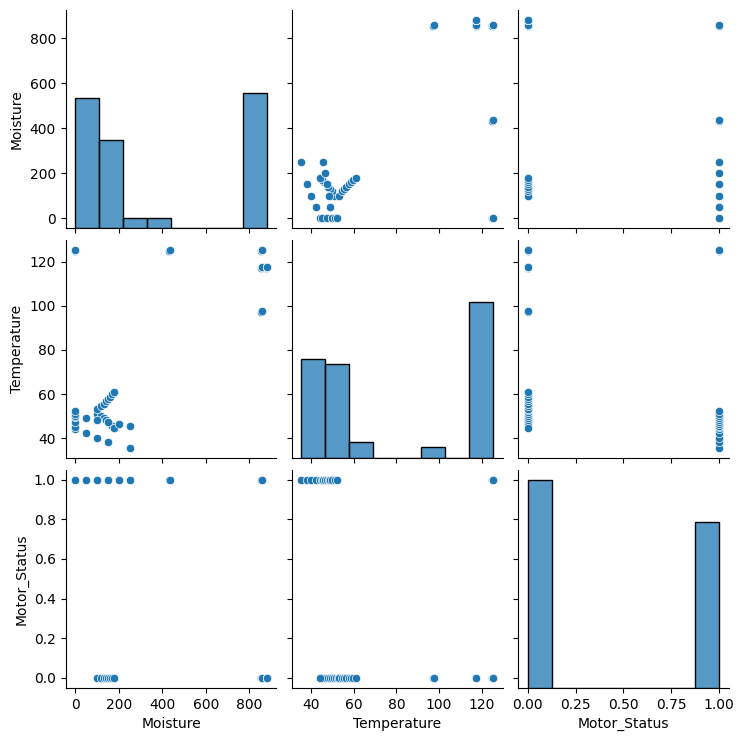

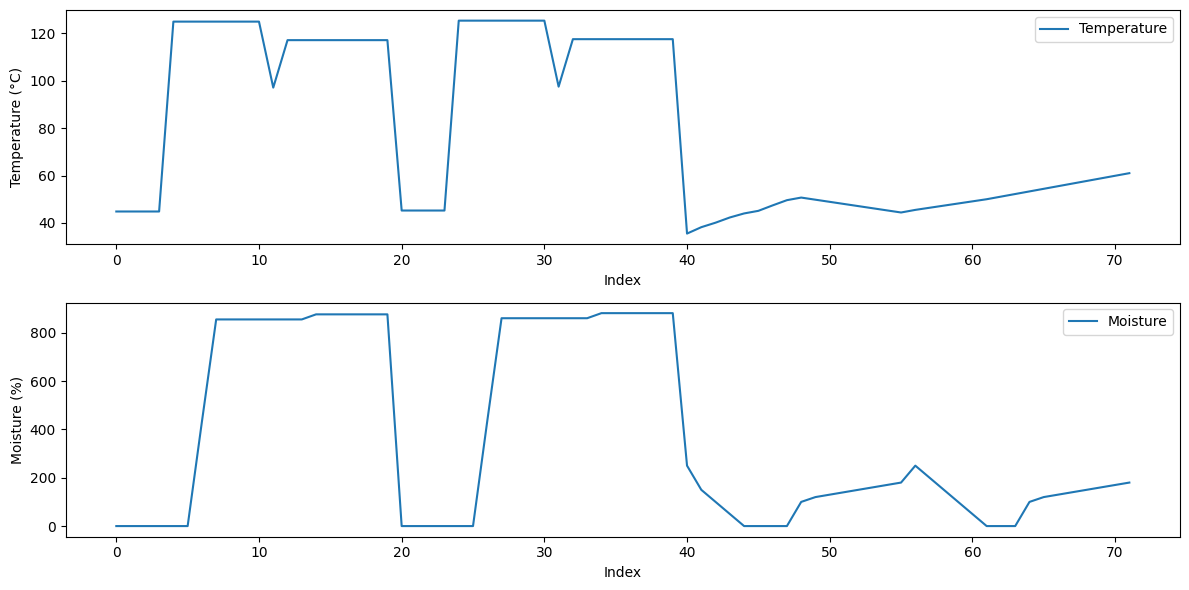

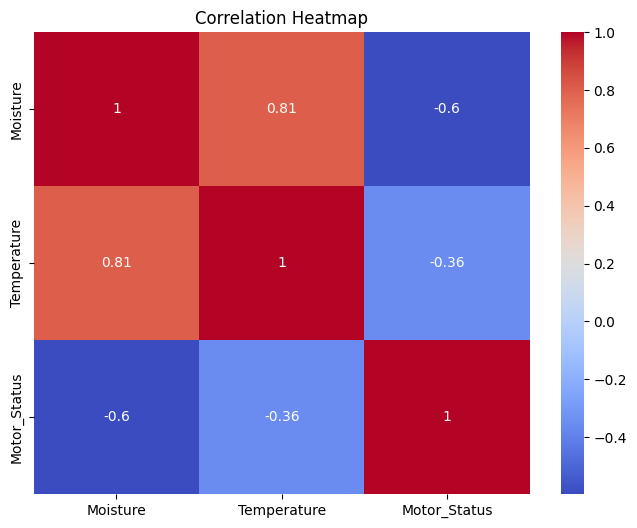

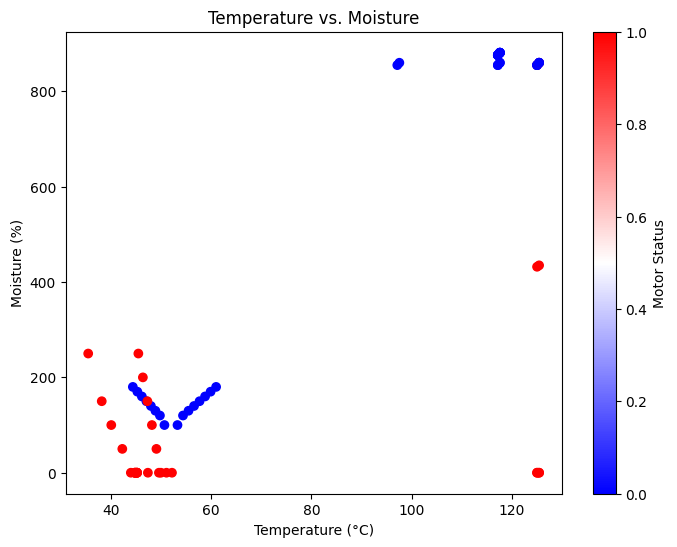

LogisticRegression Accuracy: 0.8666666666666667
LogisticRegression F1-Score: 0.8571428571428571
DecisionTreeClassifier Accuracy: 0.9333333333333333
DecisionTreeClassifier F1-Score: 0.9230769230769231
RandomForestClassifier Accuracy: 1.0
RandomForestClassifier F1-Score: 1.0
Turn on the water pump


C:\Users\gayat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [7]:
import sys
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Load the dataset
data = pd.read_csv('sensor_data.csv')

# Rename columns if necessary
data.columns = ['Moisture', 'Temperature', 'Motor_Status']

# Handle missing values
data = data.dropna()

# Convert categorical variables to numerical (if applicable)
data['Motor_Status'] = data['Motor_Status'].map({'ON': 1, 'OFF': 0})

# Descriptive statistics
print(data.describe())

# Visualize the relationship between variables
sns.pairplot(data)
plt.show()

# Plot temperature and humidity over time
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Temperature'], label='Temperature')
plt.xlabel('Index')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data.index, data['Moisture'], label='Moisture')
plt.xlabel('Index')
plt.ylabel('Moisture (%)')
plt.legend()
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot of temperature vs. moisture
plt.figure(figsize=(8, 6))
plt.scatter(data['Temperature'], data['Moisture'], c=data['Motor_Status'], cmap='bwr')
plt.colorbar(label='Motor Status')
plt.xlabel('Temperature (°C)')
plt.ylabel('Moisture (%)')
plt.title('Temperature vs. Moisture')
plt.show()

# Scale the features
scaler = MinMaxScaler()
data[['Moisture', 'Temperature']] = scaler.fit_transform(data[['Moisture', 'Temperature']])

# Split the data into features and target
X = data[['Moisture', 'Temperature']]
y = data['Motor_Status']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{model.__class__.__name__} F1-Score: {f1_score(y_test, y_pred)}")

# Select the best performing model
best_model = models[2]  

# Make predictions on new data
new_data = [[0.3, 25.0]]  
prediction = best_model.predict(new_data)

if prediction[0] == 1:
    print("Turn on the water pump")
else:
    print("Turn off the water pump")
